# Import libary that essential

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

## Read data from file

In [2]:
data = pd.read_csv('./../data/Madrid Daily Weather 1997-2015.csv')

## Preparation
- look at the over all of data

In [3]:
data.describe()

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
count,6810.000000,6809.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6810.000000,6812.000000,...,6812.000000,5872.000000,5872.000000,5872.000000,6812.000000,6812.000000,3506.000000,6812.000000,5440.000000,6812.000000
mean,21.039648,14.658687,8.640529,8.120705,4.976211,1.451248,81.139354,57.971366,34.729369,1020.529360,...,1015.217410,14.644074,11.719857,9.134877,21.953171,9.170728,43.988306,0.111182,3.206066,197.234586
std,8.867187,7.580461,6.837626,4.741067,4.654270,4.909705,17.531839,19.675744,19.320359,6.235941,...,6.944745,8.770024,5.592324,5.075065,9.903914,5.110013,12.252462,0.967174,1.808948,119.872777
min,0.000000,-3.000000,-10.000000,-12.000000,-15.000000,-22.000000,16.000000,15.000000,4.000000,994.000000,...,965.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,-1.000000
25%,13.000000,8.000000,3.000000,5.000000,2.000000,-2.000000,68.000000,41.000000,19.000000,1017.000000,...,1011.000000,10.000000,10.000000,7.000000,14.000000,6.000000,35.000000,0.000000,2.000000,66.000000
50%,20.000000,14.000000,9.000000,8.000000,6.000000,2.000000,87.000000,59.000000,32.000000,1020.000000,...,1015.000000,10.000000,10.000000,10.000000,21.000000,8.000000,42.000000,0.000000,3.000000,223.000000
75%,29.000000,21.000000,14.000000,12.000000,8.000000,5.000000,94.000000,74.000000,47.750000,1024.000000,...,1019.000000,10.000000,10.000000,10.000000,27.000000,11.000000,52.000000,0.000000,5.000000,299.000000
max,41.000000,32.000000,28.000000,20.000000,16.000000,14.000000,100.000000,100.000000,100.000000,1047.000000,...,1041.000000,31.000000,31.000000,31.000000,182.000000,39.000000,103.000000,32.000000,8.000000,360.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CET                          6812 non-null   object 
 1   Max TemperatureC             6810 non-null   float64
 2   Mean TemperatureC            6809 non-null   float64
 3   Min TemperatureC             6810 non-null   float64
 4   Dew PointC                   6810 non-null   float64
 5   MeanDew PointC               6810 non-null   float64
 6   Min DewpointC                6810 non-null   float64
 7   Max Humidity                 6810 non-null   float64
 8    Mean Humidity               6810 non-null   float64
 9    Min Humidity                6810 non-null   float64
 10   Max Sea Level PressurehPa   6812 non-null   int64  
 11   Mean Sea Level PressurehPa  6812 non-null   int64  
 12   Min Sea Level PressurehPa   6812 non-null   int64  
 13   Max VisibilityKm 

In [5]:
data.head(10)

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.0,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.0,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.0,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.0,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.0,7.0,Snow,2
5,1997-01-06,7.0,3.0,1.0,2.0,-1.0,-3.0,100.0,82.0,57.0,...,10.0,10.0,10.0,11,5,NaN,0.0,4.0,NaN,64
6,1997-01-07,2.0,0.0,-2.0,1.0,-1.0,-3.0,100.0,93.0,75.0,...,10.0,7.0,0.0,6,2,NaN,0.0,7.0,Snow,43
7,1997-01-08,8.0,4.0,1.0,7.0,4.0,1.0,100.0,96.0,87.0,...,10.0,8.0,4.0,26,8,NaN,0.0,7.0,Rain,273
8,1997-01-09,12.0,10.0,8.0,8.0,3.0,0.0,100.0,65.0,44.0,...,10.0,10.0,10.0,48,23,48.0,0.0,4.0,Rain,274
9,1997-01-10,13.0,8.0,3.0,8.0,5.0,1.0,93.0,83.0,63.0,...,10.0,10.0,10.0,13,5,NaN,0.0,5.0,NaN,100


## Cleaning topic
- tidy data
- change data type
- remove duplicate
- fill missing value

In [6]:
# tidy data
# remove space from column
data.columns = data.columns.str.strip()
# change format name column
data.rename(columns = {'Dew PointC':'Max Dew PointC', 'MeanDew PointC':'Mean Dew PointC', 'Min DewpointC':'Min Dew PointC'}, inplace=True)

In [7]:
# change data type
# convert object type to datetimes type
data['CET'] = pd.to_datetime(data['CET'])

In [8]:
# check duplicate data
data[data['CET'].duplicated()]

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Max Dew PointC,Mean Dew PointC,Min Dew PointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees


In [9]:
# fill missing value
data.isna().sum()

CET                              0
Max TemperatureC                 2
Mean TemperatureC                3
Min TemperatureC                 2
Max Dew PointC                   2
Mean Dew PointC                  2
Min Dew PointC                   2
Max Humidity                     2
Mean Humidity                    2
Min Humidity                     2
Max Sea Level PressurehPa        0
Mean Sea Level PressurehPa       0
Min Sea Level PressurehPa        0
Max VisibilityKm               940
Mean VisibilityKm              940
Min VisibilitykM               940
Max Wind SpeedKm/h               0
Mean Wind SpeedKm/h              0
Max Gust SpeedKm/h            3306
Precipitationmm                  0
CloudCover                    1372
Events                        5014
WindDirDegrees                   0
dtype: int64

In [10]:
data.drop(['Events', 'Max Gust SpeedKm/h'], axis='columns', inplace=True)

In [11]:
data[data['Max TemperatureC'].isna()]

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Max Dew PointC,Mean Dew PointC,Min Dew PointC,Max Humidity,Mean Humidity,Min Humidity,...,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees
1539,2001-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1019,1018,NaN,NaN,NaN,26,14,0.0,NaN,231
1540,2001-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1019,1016,NaN,NaN,NaN,26,11,0.0,NaN,248


In [12]:
data.drop([1539, 1540], axis='index' , inplace=True)

In [13]:
temp = pd.DataFrame({'Mean TemperatureC': (data['Max TemperatureC'] + data['Min TemperatureC']) // 2})
data.fillna(value=temp, inplace=True)

In [14]:
data.isna().sum()

CET                              0
Max TemperatureC                 0
Mean TemperatureC                0
Min TemperatureC                 0
Max Dew PointC                   0
Mean Dew PointC                  0
Min Dew PointC                   0
Max Humidity                     0
Mean Humidity                    0
Min Humidity                     0
Max Sea Level PressurehPa        0
Mean Sea Level PressurehPa       0
Min Sea Level PressurehPa        0
Max VisibilityKm               938
Mean VisibilityKm              938
Min VisibilitykM               938
Max Wind SpeedKm/h               0
Mean Wind SpeedKm/h              0
Precipitationmm                  0
CloudCover                    1370
WindDirDegrees                   0
dtype: int64

## Manage outlier data

In [15]:
z = np.abs(stats.zscore(data['Mean TemperatureC']))
threshole = 20
data[z > threshole]

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Max Dew PointC,Mean Dew PointC,Min Dew PointC,Max Humidity,Mean Humidity,Min Humidity,...,Mean Sea Level PressurehPa,Min Sea Level PressurehPa,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees


<Axes: >

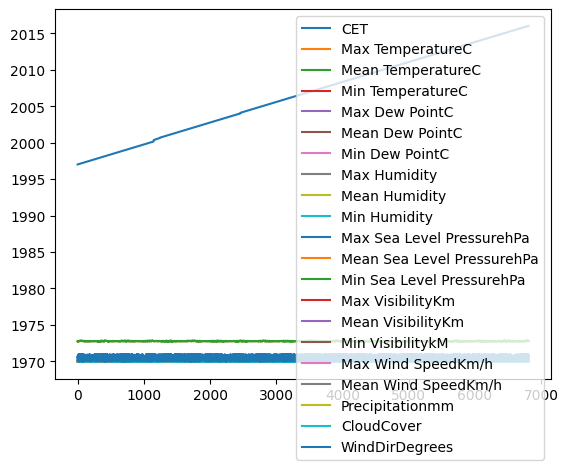

In [16]:
data.plot()

In [40]:
a = pd.melt(data, value_vars=data.columns[1:9], var_name='myVarname', value_name='myValname')
a

,myVarname,myValname
0,Max TemperatureC,7.0
1,Max TemperatureC,7.0
2,Max TemperatureC,5.0
3,Max TemperatureC,7.0
4,Max TemperatureC,2.0
...,...,...
54475,Mean Humidity,77.0
54476,Mean Humidity,78.0
54477,Mean Humidity,89.0
54478,Mean Humidity,87.0


In [41]:
sns.set(rc={"figure.figsize":(10,40)})

/home/childenchaos/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


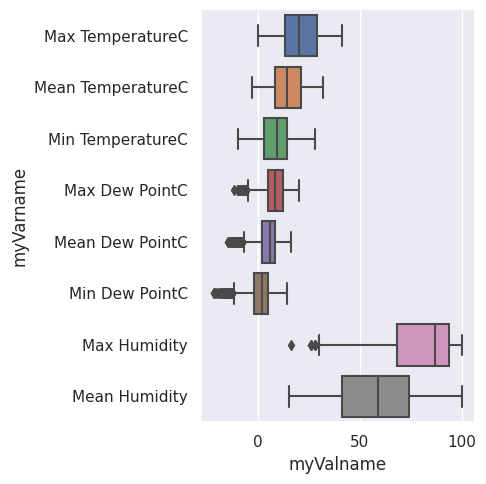

In [42]:
sns.catplot(data=a, x="myValname", y="myVarname", kind="box")

<Axes: >

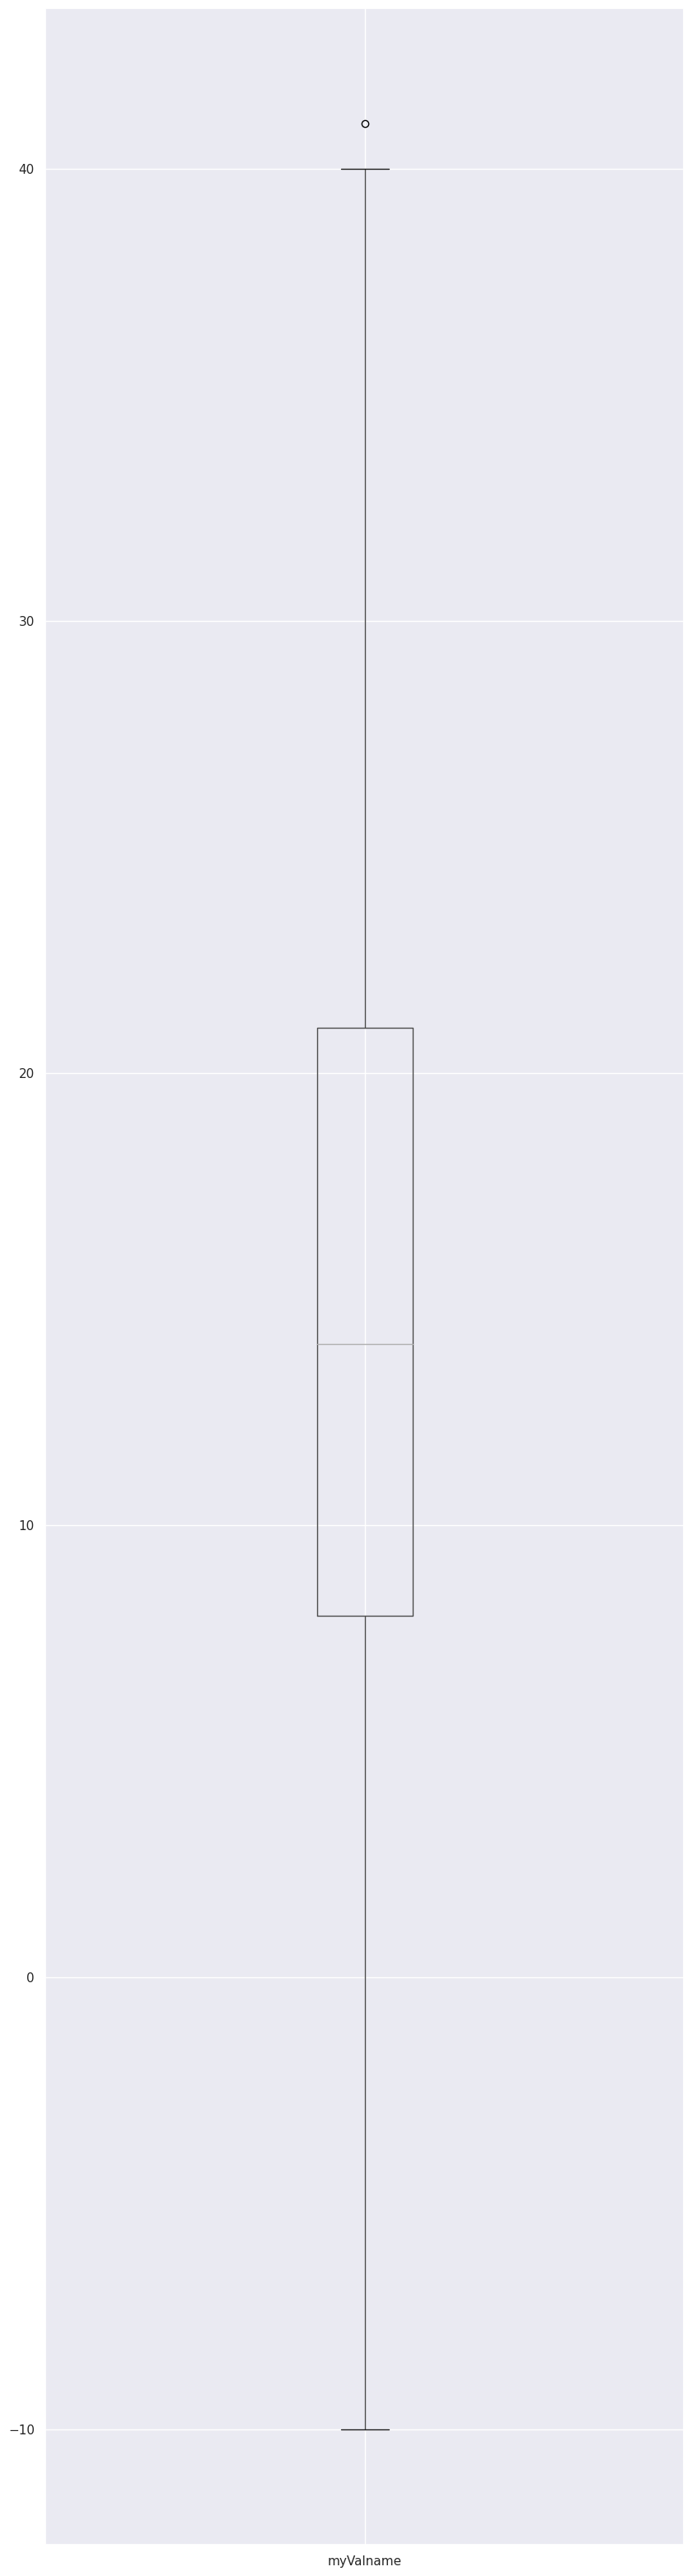

In [20]:
a.boxplot()

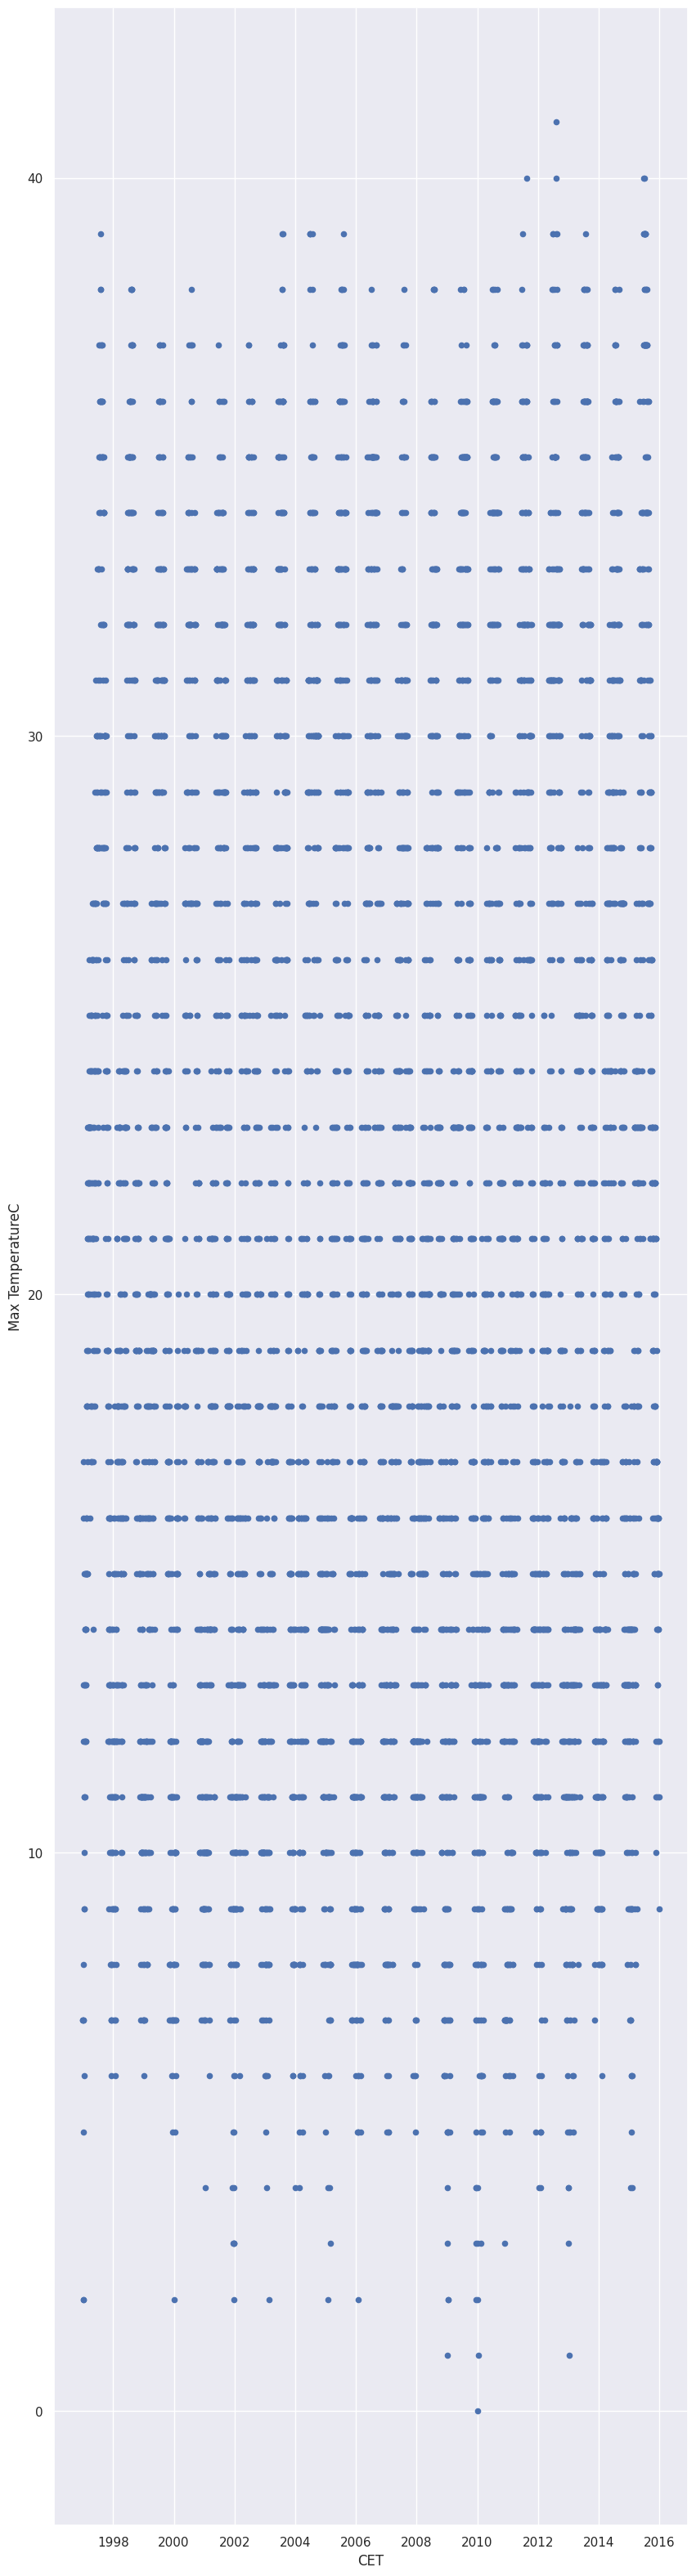

In [21]:
a = data.plot.scatter(x='CET', y='Max TemperatureC')

In [22]:
data['Max TemperatureC'].quantile([0.25, 0.075])

0.250    13.0
0.075     9.0
Name: Max TemperatureC, dtype: float64

## Analysis data

## Visualize

### topic 
- how different of data in range between 10 year
- what is pattern of temperature in each year
- Max temperature average in a year
- Min temperature average in a year

In [23]:
# select year from 2005 - 2015 that we interest
focus_data = data[(data['CET'] >= '1997-01-01')]

In [24]:
# group data by year
focus_data_year = focus_data.groupby(focus_data.CET.dt.year)

In [25]:
# find mean of temperature in a month
min_temp_y = pd.DataFrame(focus_data_year['Min TemperatureC'].mean())
max_temp_y = pd.DataFrame(focus_data_year['Max TemperatureC'].mean())
mean_temp_y = pd.DataFrame(focus_data_year['Mean TemperatureC'].mean())

In [26]:
# group max min mean
temp_y = pd.concat([min_temp_y, max_temp_y, mean_temp_y], axis=1)
temp_y

,Min TemperatureC,Max TemperatureC,Mean TemperatureC
CET,,,
1997,9.854795,21.838356,15.610959
1998,8.465753,21.106849,14.556164
1999,8.427397,20.512329,14.252055
2000,8.130112,20.553903,14.104089
2001,7.884298,19.809917,13.606061
2002,8.550685,20.178082,14.169863
2003,9.035616,20.673973,14.652055
2004,8.773810,21.083333,14.744048
2005,8.156164,21.194521,14.465753


In [27]:
# focusing data with lastest year
focus_data_month = data[(data['CET'] >= '2015-01-01')]

In [28]:
# group data by month
focus_data_month = focus_data_month.groupby(focus_data_month.CET.dt.month)

In [29]:
# mean of max, min and mean value
min_temp_m = pd.DataFrame(focus_data_month['Min TemperatureC'].mean())
max_temp_m = pd.DataFrame(focus_data_month['Max TemperatureC'].mean())
mean_temp_m = pd.DataFrame(focus_data_month['Mean TemperatureC'].mean())

In [30]:
# group three data
temp_m = pd.concat([min_temp_m, max_temp_m, mean_temp_m], axis=1)
temp_m

,Min TemperatureC,Max TemperatureC,Mean TemperatureC
CET,,,
1,-1.483871,11.903226,5.161290
2,1.785714,11.464286,6.464286
3,3.677419,17.354839,10.516129
4,7.466667,20.700000,14.066667
5,11.451613,27.354839,19.451613
6,15.833333,31.400000,23.633333
7,20.612903,36.903226,28.806452
8,17.967742,32.741935,25.290323
9,13.033333,27.066667,20.033333


(0.0, 40.0)

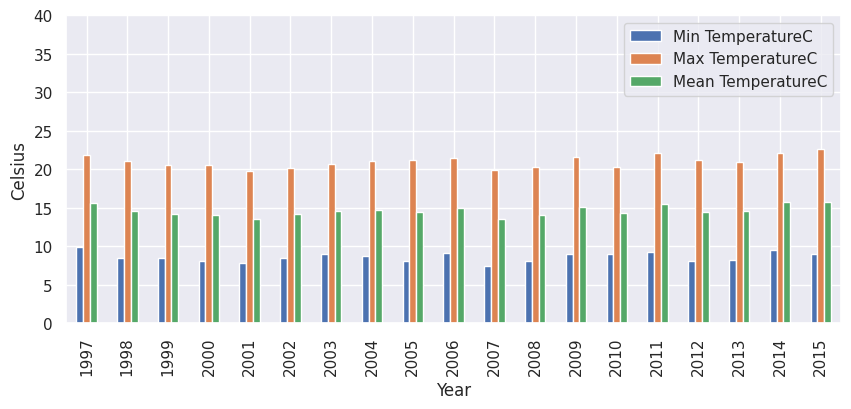

In [31]:
# temperature per year
temp_y.plot(kind="bar", figsize = (10, 4))
plt.xlabel("Year")
plt.ylabel("Celsius")
plt.ylim(0,40)

(-5.0, 40.0)

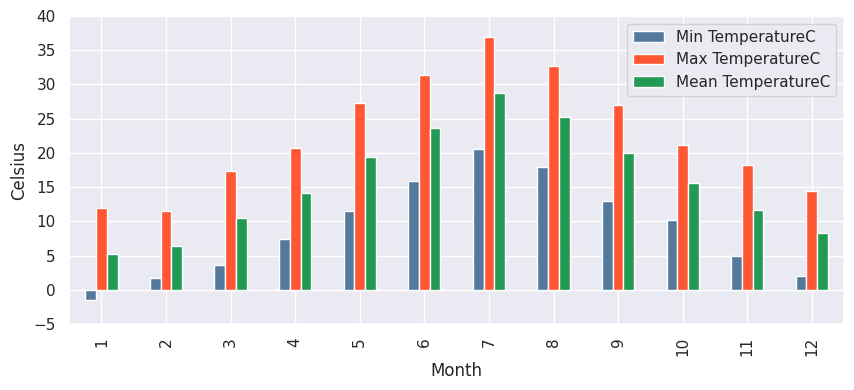

In [32]:
# temperature in latest year
temp_m.plot(kind="bar", figsize = (10, 4), color={'Max TemperatureC': '#FF5733', 'Mean TemperatureC': '#229954', 'Min TemperatureC': '#55799D'})
# temp_m.plot(kind="bar", figsize = (10, 4), color=['blue', 'oran'])
plt.xlabel("Month")
plt.ylabel("Celsius")
plt.ylim(-5,40)

## test

In [33]:
# choose column by index
# data.iloc[:, :3] 

## useful link
- https://www.analyticsvidhya.com/blog/2021/06/data-cleaning-using-pandas/#What_Is_Data_Cleaning? (cleaning data)
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html (pandas school)